In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [8]:
data=pd.read_csv(r'C:\Users\KIIT\Downloads\ElectricityConsumptionAndProduction.xls')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46011 entries, 0 to 46010
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DateTime       46011 non-null  object
 1   Consumption    46011 non-null  int64 
 2   Production     46011 non-null  int64 
 3   Nuclear        46011 non-null  int64 
 4   Wind           46011 non-null  int64 
 5   Hydroelectric  46011 non-null  int64 
 6   Oil and Gas    46011 non-null  int64 
 7   Coal           46011 non-null  int64 
 8   Solar          46011 non-null  int64 
 9   Biomass        46011 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 3.5+ MB


In [12]:
df=data.copy()

In [14]:
data['DateTime'] = pd.to_datetime(data['DateTime'])

In [16]:
# Check for duplicates
data = data.drop_duplicates()

In [18]:
data.loc[:, 'Wind'] = data['Wind'].apply(lambda x: max(x, 0))

In [20]:
# Check for missing values
print("Missing values per column:\n", data.isnull().sum())

# Drop rows with missing values
data = data.dropna()

Missing values per column:
 DateTime         0
Consumption      0
Production       0
Nuclear          0
Wind             0
Hydroelectric    0
Oil and Gas      0
Coal             0
Solar            0
Biomass          0
dtype: int64


In [22]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 46007 entries, 0 to 46010
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DateTime       46007 non-null  datetime64[ns]
 1   Consumption    46007 non-null  int64         
 2   Production     46007 non-null  int64         
 3   Nuclear        46007 non-null  int64         
 4   Wind           46007 non-null  int64         
 5   Hydroelectric  46007 non-null  int64         
 6   Oil and Gas    46007 non-null  int64         
 7   Coal           46007 non-null  int64         
 8   Solar          46007 non-null  int64         
 9   Biomass        46007 non-null  int64         
dtypes: datetime64[ns](1), int64(9)
memory usage: 3.9 MB
None


In [24]:
# Step 2: Exploratory Data Analysis
# Summary statistics
print(data.describe())

                            DateTime   Consumption    Production  \
count                          46007  46007.000000  46007.000000   
mean   2021-08-16 11:33:32.876301056   6587.748821   6518.769013   
min              2019-01-01 00:00:00   3889.000000   3315.000000   
25%              2020-04-24 06:30:00   5773.000000   5814.000000   
50%              2021-08-16 12:00:00   6552.000000   6462.000000   
75%              2022-12-08 16:30:00   7321.000000   7176.000000   
max              2024-03-31 23:00:00   9615.000000   9886.000000   
std                              NaN   1043.599203    986.752998   

            Nuclear          Wind  Hydroelectric   Oil and Gas          Coal  \
count  46007.000000  46007.000000   46007.000000  46007.000000  46007.000000   
mean    1291.168257    792.441389    1857.125959   1171.915122   1193.151760   
min      562.000000      0.000000     175.000000    198.000000    279.000000   
25%     1347.000000    236.000000    1347.000000    858.000000    9

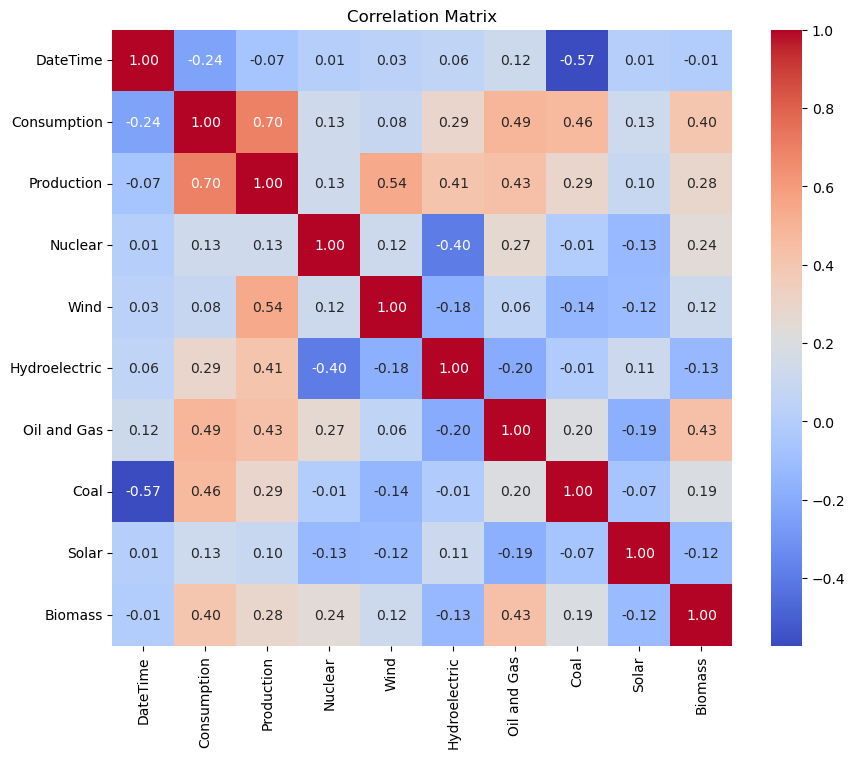

In [26]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

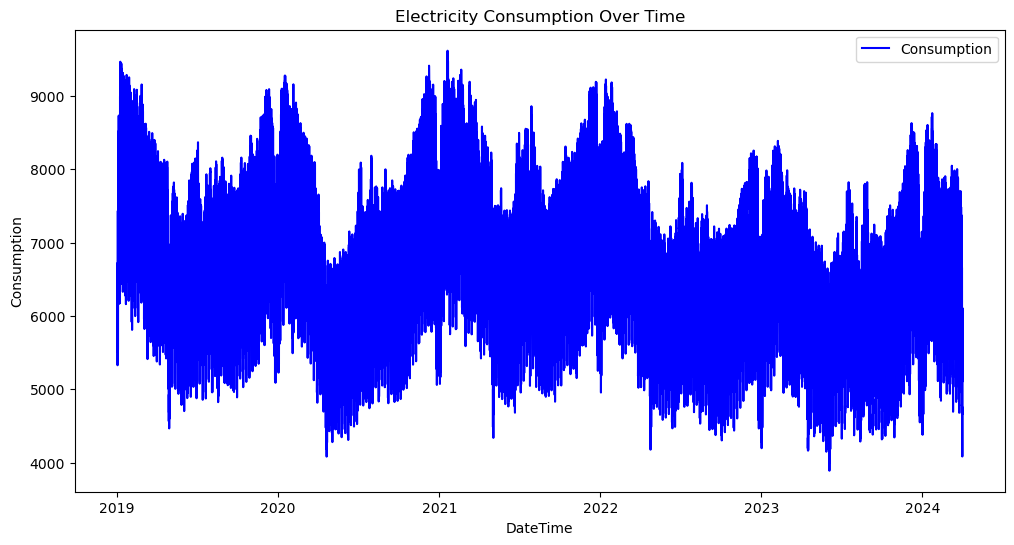

In [28]:
# Plot Consumption vs. DateTime
plt.figure(figsize=(12, 6))
plt.plot(data['DateTime'], data['Consumption'], label='Consumption', color='blue')
plt.xlabel('DateTime')
plt.ylabel('Consumption')
plt.title('Electricity Consumption Over Time')
plt.legend()
plt.show()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46011 entries, 0 to 46010
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DateTime       46011 non-null  object
 1   Consumption    46011 non-null  int64 
 2   Production     46011 non-null  int64 
 3   Nuclear        46011 non-null  int64 
 4   Wind           46011 non-null  int64 
 5   Hydroelectric  46011 non-null  int64 
 6   Oil and Gas    46011 non-null  int64 
 7   Coal           46011 non-null  int64 
 8   Solar          46011 non-null  int64 
 9   Biomass        46011 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 3.5+ MB


In [32]:
data['Consumption'].median()

6552.0

In [34]:
data['consumption_cat'] = np.where(data['Consumption'] > df['Consumption'].median(), 'More', 'Less')

In [120]:
data['consumption_cat'].value_counts()

consumption_cat
0    23017
1    22990
Name: count, dtype: int64

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46007 entries, 0 to 46010
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   DateTime         46007 non-null  datetime64[ns]
 1   Consumption      46007 non-null  int64         
 2   Production       46007 non-null  int64         
 3   Nuclear          46007 non-null  int64         
 4   Wind             46007 non-null  int64         
 5   Hydroelectric    46007 non-null  int64         
 6   Oil and Gas      46007 non-null  int64         
 7   Coal             46007 non-null  int64         
 8   Solar            46007 non-null  int64         
 9   Biomass          46007 non-null  int64         
 10  consumption_cat  46007 non-null  object        
dtypes: datetime64[ns](1), int64(9), object(1)
memory usage: 4.2+ MB


In [38]:
data.drop('Consumption',inplace=True,axis=1)

In [40]:
data['consumption_cat'] = data['consumption_cat'].map({'Less': 0, 'More': 1})

In [42]:
data

,DateTime,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass,consumption_cat
0,2019-01-01 00:00:00,6527,1395,79,1383,1896,1744,0,30,0
1,2019-01-01 01:00:00,5701,1393,96,1112,1429,1641,0,30,0
2,2019-01-01 02:00:00,5676,1393,142,1030,1465,1616,0,30,0
3,2019-01-01 03:00:00,5603,1397,191,972,1455,1558,0,30,0
4,2019-01-01 04:00:00,5454,1393,159,960,1454,1458,0,30,0
...,...,...,...,...,...,...,...,...,...,...
46006,2024-03-31 19:00:00,5902,1398,505,2294,1012,620,6,65,0
46007,2024-03-31 20:00:00,6205,1395,671,2389,1037,645,0,66,0
46008,2024-03-31 21:00:00,5855,1395,868,2201,705,621,0,66,0
46009,2024-03-31 22:00:00,5726,1393,908,2088,648,622,0,66,0


In [44]:
data['year'] = data['DateTime'].dt.year
data['month'] = data['DateTime'].dt.month
data['day'] = data['DateTime'].dt.day
data['hour'] = data['DateTime'].dt.hour  # If timestamp exists
data['weekday'] = data['DateTime'].dt.weekday  # Monday=0, Sunday=6

In [46]:
data = data.drop(columns=['DateTime'])

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop(columns=['consumption_cat'])  # Exclude target column
y = data['consumption_cat']

# Apply StandardScaler to all numeric columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Returns a NumPy array

# Train-test split with scaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [50]:
X = pd.get_dummies(X, drop_first=True)

In [52]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46007 entries, 0 to 46010
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Production     46007 non-null  int64
 1   Nuclear        46007 non-null  int64
 2   Wind           46007 non-null  int64
 3   Hydroelectric  46007 non-null  int64
 4   Oil and Gas    46007 non-null  int64
 5   Coal           46007 non-null  int64
 6   Solar          46007 non-null  int64
 7   Biomass        46007 non-null  int64
 8   year           46007 non-null  int32
 9   month          46007 non-null  int32
 10  day            46007 non-null  int32
 11  hour           46007 non-null  int32
 12  weekday        46007 non-null  int32
dtypes: int32(5), int64(8)
memory usage: 4.0 MB


In [54]:
y.info()

<class 'pandas.core.series.Series'>
Index: 46007 entries, 0 to 46010
Series name: consumption_cat
Non-Null Count  Dtype
--------------  -----
46007 non-null  int64
dtypes: int64(1)
memory usage: 718.9 KB


In [56]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Confusion Matrix:
[[3950  638]
 [ 655 3959]]


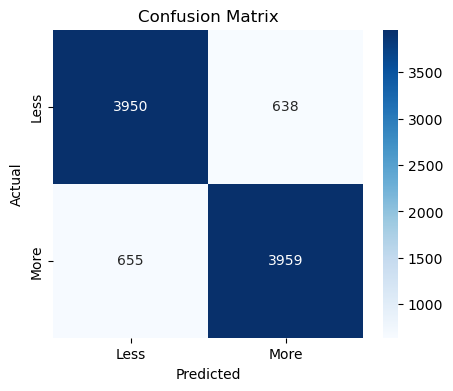

In [58]:
from sklearn.metrics import confusion_matrix

# Generate predictions
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Less', 'More'], yticklabels=['Less', 'More'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Compute scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8595
Precision: 0.8612
Recall: 0.8580
F1 Score: 0.8596

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      4588
           1       0.86      0.86      0.86      4614

    accuracy                           0.86      9202
   macro avg       0.86      0.86      0.86      9202
weighted avg       0.86      0.86      0.86      9202



In [62]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [64]:
y_pred_dt = dt_model.predict(X_test)

In [66]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Print results
print(f'Decision Tree Accuracy: {accuracy_dt:.4f}')
print(f'Precision: {precision_dt:.4f}')
print(f'Recall: {recall_dt:.4f}')
print(f'F1 Score: {f1_dt:.4f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9222
Precision: 0.9215
Recall: 0.9235
F1 Score: 0.9225

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      4588
           1       0.92      0.92      0.92      4614

    accuracy                           0.92      9202
   macro avg       0.92      0.92      0.92      9202
weighted avg       0.92      0.92      0.92      9202



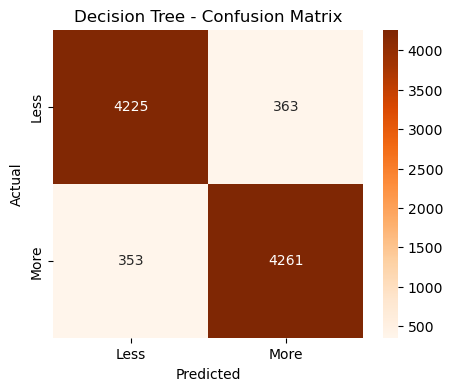

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(5,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges', xticklabels=['Less', 'More'], yticklabels=['Less', 'More'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree - Confusion Matrix')
plt.show()

In [70]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [72]:
df['year'] = df['DateTime'].dt.year
df['month'] = df['DateTime'].dt.month
df['day'] = df['DateTime'].dt.day
df['hour'] = df['DateTime'].dt.hour  # If timestamp exists
df['weekday'] = df['DateTime'].dt.weekday  # Monday=0, Sunday=6
df=df.drop(columns=['DateTime'])

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46011 entries, 0 to 46010
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Consumption    46011 non-null  int64
 1   Production     46011 non-null  int64
 2   Nuclear        46011 non-null  int64
 3   Wind           46011 non-null  int64
 4   Hydroelectric  46011 non-null  int64
 5   Oil and Gas    46011 non-null  int64
 6   Coal           46011 non-null  int64
 7   Solar          46011 non-null  int64
 8   Biomass        46011 non-null  int64
 9   year           46011 non-null  int32
 10  month          46011 non-null  int32
 11  day            46011 non-null  int32
 12  hour           46011 non-null  int32
 13  weekday        46011 non-null  int32
dtypes: int32(5), int64(9)
memory usage: 4.0 MB


In [ ]:
#df.drop('consumption_cat',axis=1,inplace=True)

In [80]:
# Linear regresssion
X = df.drop(columns=['Consumption'],axis=1) 
y = df['Consumption']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Compute predictions
y_pred_lr = lr_model.predict(X_test)

# Performance metrics
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2 = r2_score(y_test, y_pred_lr)

# Print results
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R² Score: {r2:.4f}')  

Mean Absolute Error (MAE): 407.9498
Mean Squared Error (MSE): 266620.6814
Root Mean Squared Error (RMSE): 516.3533
R² Score: 0.7593


In [88]:
# Random Forest
X = data.drop(columns=['consumption_cat'])  # Exclude target column
y = data['consumption_cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)

Random Forest Accuracy: 0.9511
Random Forest Precision: 0.9511
Random Forest Recall: 0.9511
Random Forest F1 Score: 0.9511
Confusion Matrix:
[[4402  202]
 [ 248 4350]]


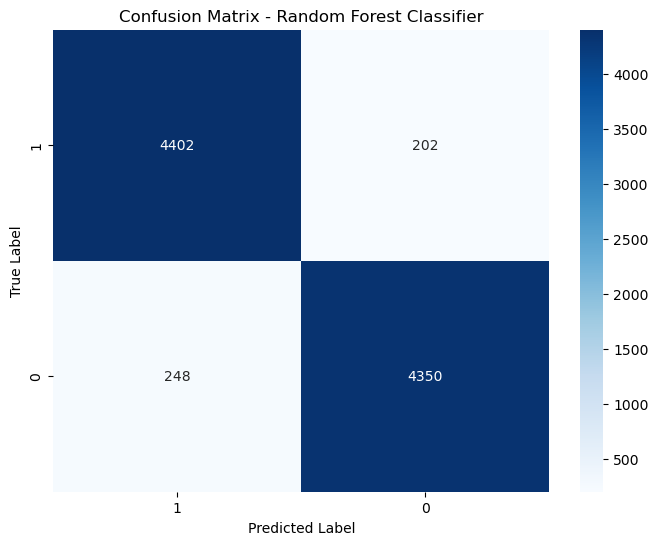

In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate performance metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Print Results
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest Precision: {precision_rf:.4f}")
print(f"Random Forest Recall: {recall_rf:.4f}")
print(f"Random Forest F1 Score: {f1_rf:.4f}")
print("Confusion Matrix:")
print(conf_matrix_rf)
# Plot using Seaborn
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=y_test.unique(), yticklabels=y_test.unique())

# Labels and Title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()


In [92]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate performance metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Print Results
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest Precision: {precision_rf:.4f}")
print(f"Random Forest Recall: {recall_rf:.4f}")
print(f"Random Forest F1 Score: {f1_rf:.4f}")


Random Forest Accuracy: 0.9511
Random Forest Precision: 0.9511
Random Forest Recall: 0.9511
Random Forest F1 Score: 0.9511


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46007 entries, 0 to 46010
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Production       46007 non-null  int64
 1   Nuclear          46007 non-null  int64
 2   Wind             46007 non-null  int64
 3   Hydroelectric    46007 non-null  int64
 4   Oil and Gas      46007 non-null  int64
 5   Coal             46007 non-null  int64
 6   Solar            46007 non-null  int64
 7   Biomass          46007 non-null  int64
 8   consumption_cat  46007 non-null  int64
 9   year             46007 non-null  int32
 10  month            46007 non-null  int32
 11  day              46007 non-null  int32
 12  hour             46007 non-null  int32
 13  weekday          46007 non-null  int32
dtypes: int32(5), int64(9)
memory usage: 4.4 MB


In [96]:
df_arima=data.copy()

In [98]:
df_arima['date_column'] = pd.to_datetime(df_arima[['year', 'month', 'day']])

In [100]:
df_arima.set_index('date_column', inplace=True)
df_arima = df_arima.sort_index()

In [106]:
print(df_arima.columns)

Index(['Production', 'Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal',
       'Solar', 'Biomass', 'consumption_cat', 'year', 'month', 'day', 'hour',
       'weekday'],
      dtype='object')


In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression, LogisticRegression

# Assuming 'df_arima' is already indexed by date and sorted

# ARIMA Model
train_size = int(len(df_arima) * 0.8)
train, test = df_arima.iloc[:train_size], df_arima.iloc[train_size:]

arima_model = ARIMA(train['consumption_cat'], order=(5,1,0))  # Adjust order as needed
arima_result = arima_model.fit()
predictions_arima = arima_result.forecast(steps=len(test))

# Converting ARIMA predictions to classification labels
test['arima_pred'] = np.where(predictions_arima > test['consumption_cat'].median(), 1, 0)

# KNN Model
X = df_arima.drop(columns=['consumption_cat'])
y = df_arima['consumption_cat']
y_class = np.where(y > y.median(), 1, 0)  # Binarizing target for classification

X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Model Comparison
accuracy_arima = accuracy_score(test['consumption_cat'], test['arima_pred'])
precision_arima = precision_score(test['consumption_cat'], test['arima_pred'])
recall_arima = recall_score(test['consumption_cat'], test['arima_pred'])
f1_arima = f1_score(test['consumption_cat'], test['arima_pred'])

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Print results
print("ARIMA Results:")
print(f"Accuracy: {accuracy_arima}, Precision: {precision_arima}, Recall: {recall_arima}, F1-score: {f1_arima}")
print("\nKNN Results:")
print(f"Accuracy: {accuracy_knn}, Precision: {precision_knn}, Recall: {recall_knn}, F1-score: {f1_knn}")

C:\Users\KIIT\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\KIIT\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\KIIT\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\KIIT\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

ARIMA Results:
Accuracy: 0.31927841773527493, Precision: 0.31927841773527493, Recall: 1.0, F1-score: 0.48401976935749585

KNN Results:
Accuracy: 0.866768093892632, Precision: 0.8734567901234568, Recall: 0.858690940615518, F1-score: 0.8660109289617486


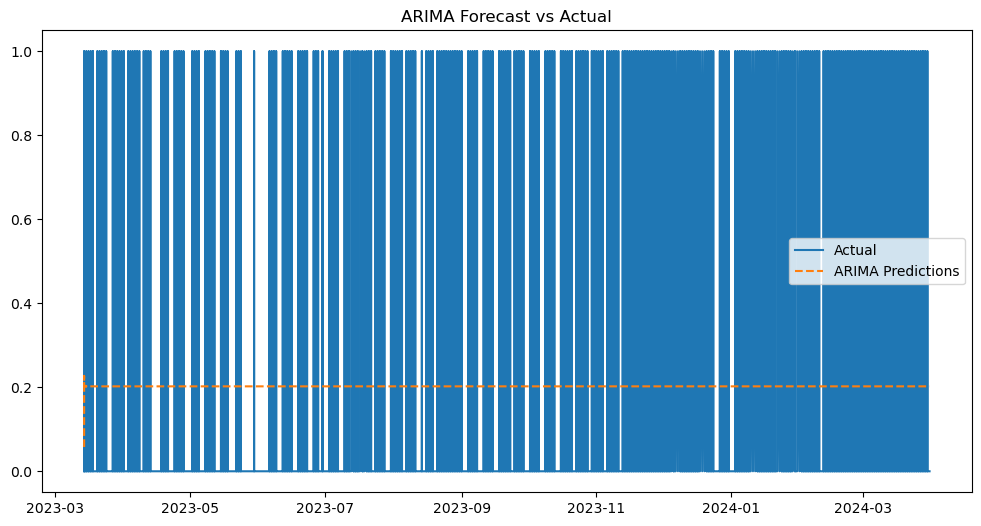

In [112]:
# Plotting ARIMA Forecast
plt.figure(figsize=(12,6))
plt.plot(test.index, test['consumption_cat'], label='Actual')
plt.plot(test.index, predictions_arima, label='ARIMA Predictions', linestyle='dashed')
plt.legend()
plt.title('ARIMA Forecast vs Actual')
plt.show()

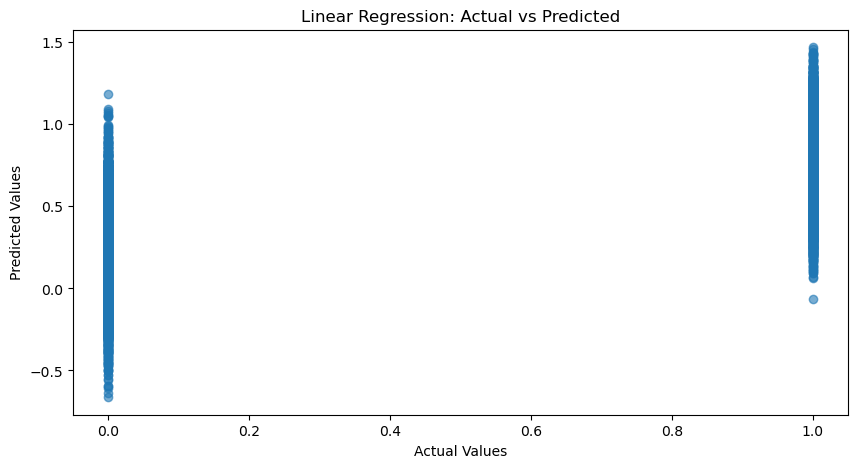

In [114]:
# Linear Regression Plot
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_linreg = lin_reg.predict(X_test)

plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_linreg, alpha=0.6)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


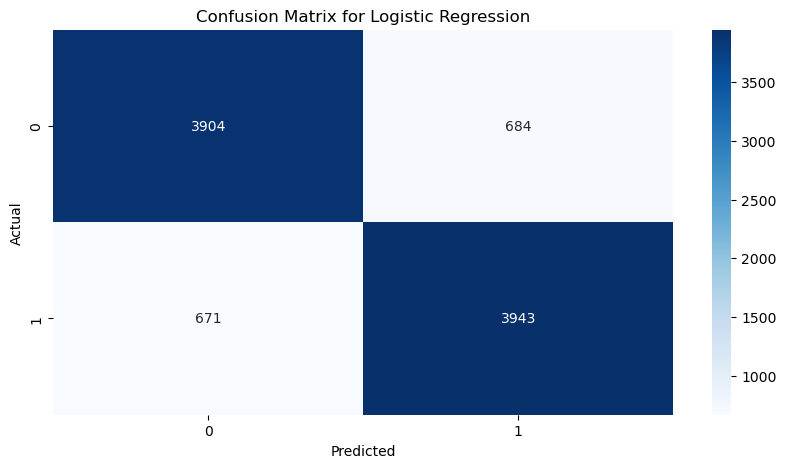

In [116]:
# Logistic Regression Plot
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_logreg = log_reg.predict(X_test)

plt.figure(figsize=(10,5))
sns.heatmap(pd.crosstab(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

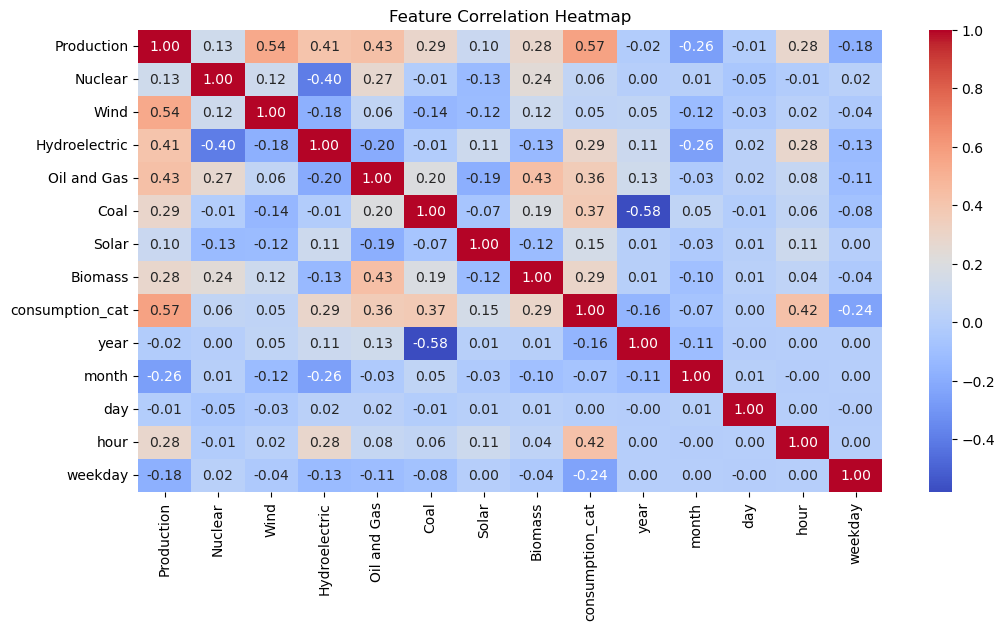

In [118]:
# Full Dataset Visualization
plt.figure(figsize=(12,6))
sns.heatmap(df_arima.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

C:\Users\KIIT\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\KIIT\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\KIIT\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\KIIT\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

ARIMA-KNN Hybrid Model Performance:
Mean Squared Error (MSE): 22156.34548702249
Mean Absolute Error (MAE): 117.3136533452121
R-squared Score (R²): 0.974690455511405


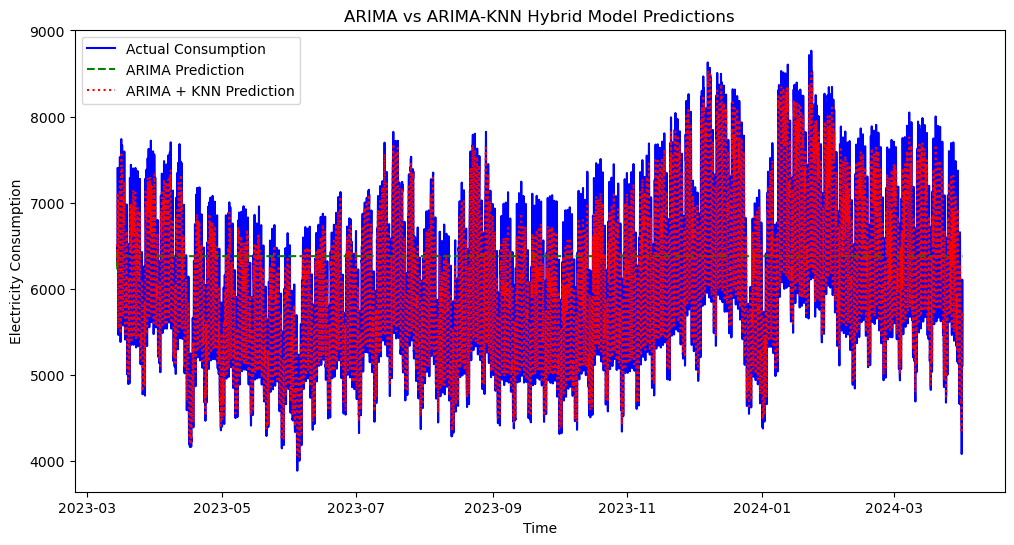

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv("ElectricityConsumptionAndProduction.csv", parse_dates=["DateTime"], index_col="DateTime")

# Using only Consumption for prediction
df = df[['Consumption']].dropna()

# Split data into training and testing sets (80% train, 20% test)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Step 1: Train ARIMA Model
arima_order = (5, 1, 0)  # (p, d, q) values can be tuned based on ACF/PACF plots
arima_model = ARIMA(train, order=arima_order)
arima_fit = arima_model.fit()

# Step 2: ARIMA Predictions & Residual Calculation
# Ensure ARIMA predicts the exact number of test samples
arima_pred = arima_fit.forecast(steps=len(test))[:len(test)]  # Trim to match test length
residuals = test["Consumption"].values - arima_pred  # Convert to NumPy array for compatibility

# Step 3: Train KNN on Residuals
k = 5  # Optimal k value can be tuned
knn_model = KNeighborsRegressor(n_neighbors=k)
X_train = np.arange(len(residuals)).reshape(-1, 1)  # Time as feature
knn_model.fit(X_train, residuals)

# Step 4: Predict Residuals using KNN
X_test = np.arange(len(residuals)).reshape(-1, 1)
knn_residual_pred = knn_model.predict(X_test)

# Step 5: Final Prediction (ARIMA + KNN Residuals)
final_pred = arima_pred + knn_residual_pred

# Evaluation Metrics
mse = mean_squared_error(test["Consumption"], final_pred)
mae = mean_absolute_error(test["Consumption"], final_pred)
r2 = r2_score(test["Consumption"], final_pred)

print(f"ARIMA-KNN Hybrid Model Performance:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared Score (R²): {r2}")

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(test.index, test["Consumption"], label="Actual Consumption", color="blue")
plt.plot(test.index, arima_pred, label="ARIMA Prediction", linestyle="dashed", color="green")
plt.plot(test.index, final_pred, label="ARIMA + KNN Prediction", linestyle="dotted", color="red")
plt.legend()
plt.title("ARIMA vs ARIMA-KNN Hybrid Model Predictions")
plt.xlabel("Time")
plt.ylabel("Electricity Consumption")
plt.show()
